In [1]:
import yt

In [2]:
ds = yt.load("/Users/jillnaiman/Downloads/IsolatedGalaxy/galaxy0030/galaxy0030")

yt : [INFO     ] 2020-11-30 19:08:47,651 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2020-11-30 19:08:47,652 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-11-30 19:08:47,654 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-30 19:08:47,656 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-11-30 19:08:47,656 Parameters: cosmological_simulation   = 0.0


In [3]:
# print out the statistics of this dataset
ds.print_stats()

Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 11546.47it/s]
yt : [INFO     ] 2020-11-30 19:10:00,176 Gathering a field list (this may take a moment.)


level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	         32768	            32
  1	     8	         34304	            33
  2	     8	        181888	            57
  3	     8	        646968	            87
  4	    15	        947856	            99
  5	    51	        874128	            96
  6	    18	        786328	            93
  7	    28	        446776	            77
  8	    36	        209400	            60
----------------------------------------------
   	   173	       4160416


t = 6.00002000e-03 = 1.39768066e+16 s = 4.42898275e+08 years

Smallest Cell:
	Width: 1.221e-04 Mpc
	Width: 1.221e+02 pc
	Width: 2.518e+07 AU
	Width: 3.767e+20 cm


In [4]:
ds.field_list

[('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('enzo', 'Average_creation_time'),
 ('enzo', 'Bx'),
 ('enzo', 'By'),
 ('enzo', 'Bz'),
 ('enzo', 'Cooling_Time'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'Electron_Density'),
 ('enzo', 'Forming_Stellar_Mass_Density'),
 ('enzo', 'Galaxy1Colour'),
 ('enzo', 'Galaxy2Colour'),
 ('enzo', 'HII_Density'),
 ('enzo', 'HI_Density'),
 ('enzo', 'HeIII_Density'),
 ('enzo', 'HeII_Density'),
 ('enzo', 'HeI_Density'),
 ('enzo', 'MBHColour'),
 ('enzo', 'Metal_Density'),
 ('enzo', 'PhiField'),
 ('enzo', 'Phi_pField'),
 ('enzo', 'SFR_Density'),
 ('enzo', 'Star_Particle_Density'),
 ('enzo', 'Temperature'),
 ('enzo', '

In [5]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('al

In [7]:
ds.domain_right_edge, ds.domain_left_edge

(YTArray([1., 1., 1.]) code_length, YTArray([0., 0., 0.]) code_length)

In [9]:
ds.r[:].max("density"), ds.r[:].min("density")
# printing out the min/max density of gas in the box

(7.73426503924e-24 g/cm**3, 8.472937507539987e-32 g/cm**3)

In [10]:
ds.r[:].argmax("density")
# giving us the location of maximum density

(1.5556197509765625e+24 cm,
 1.5424349365234375e+24 cm,
 1.5435650634765623e+24 cm)

yt : [INFO     ] 2020-11-30 19:19:59,514 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-11-30 19:19:59,515 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-11-30 19:19:59,516 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2020-11-30 19:19:59,645 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



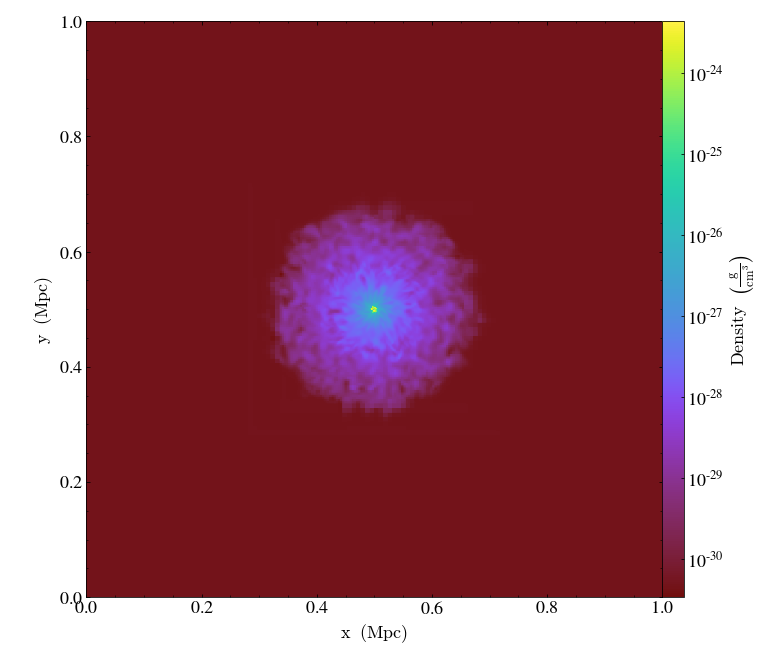

In [17]:
# really quick plot of our whole dataset

# Just for teaching's sake:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [1,1]

p = ds.r[:,:, 0.5].plot("density")
#p = ds.r[:,0.5, :].plot("density")

yt : [INFO     ] 2020-11-30 19:20:00,062 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2020-11-30 19:20:00,068 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



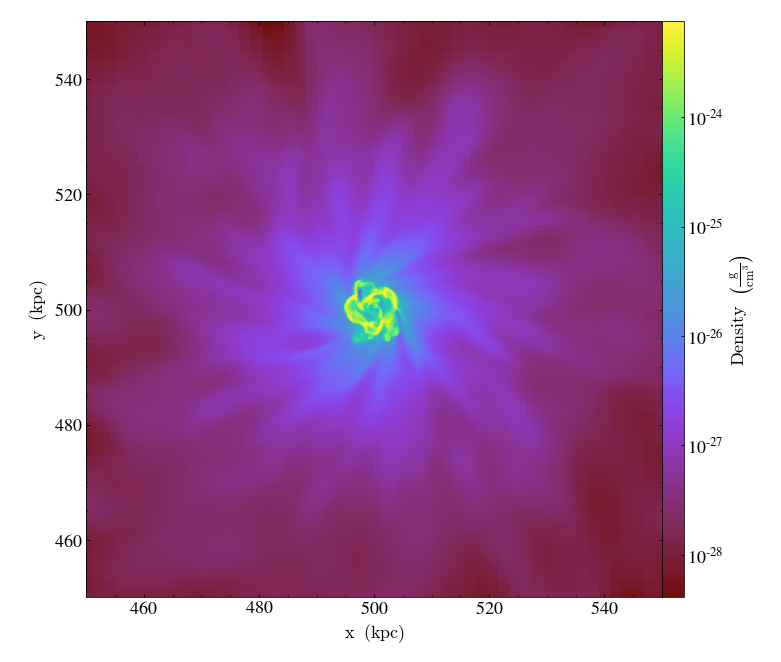

In [18]:
# manipulate our view using the plot object
p.zoom(10)

In [19]:
# we can also use yt to do some unit conversion
(yt.units.kpc).in_units('cm')

3.0856775809623245e+21 cm

In [20]:
(2*yt.units.kpc**3).in_units('cm**3')

5.875997889170356e+64 cm**3


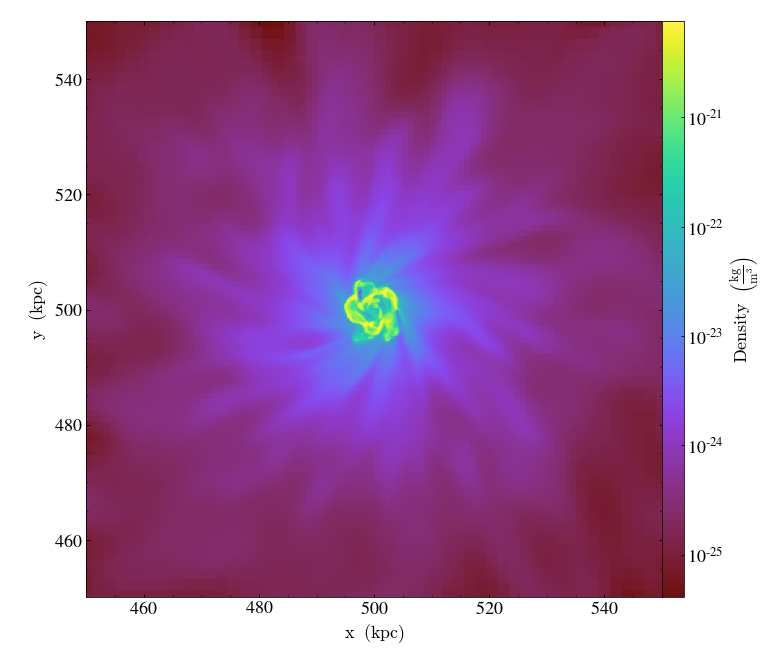

In [22]:
# use unit conversions on our plots as well
p.set_unit('density', 'kg/m**3')


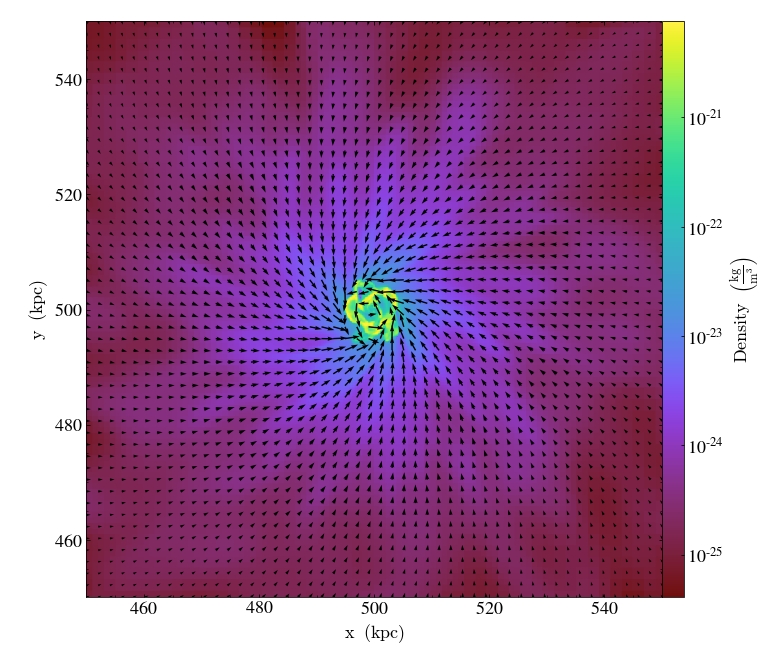

In [23]:
p.annotate_velocity()

yt : [INFO     ] 2020-11-30 19:24:15,603 Projection completed
yt : [INFO     ] 2020-11-30 19:24:15,604 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-11-30 19:24:15,605 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-11-30 19:24:15,606 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



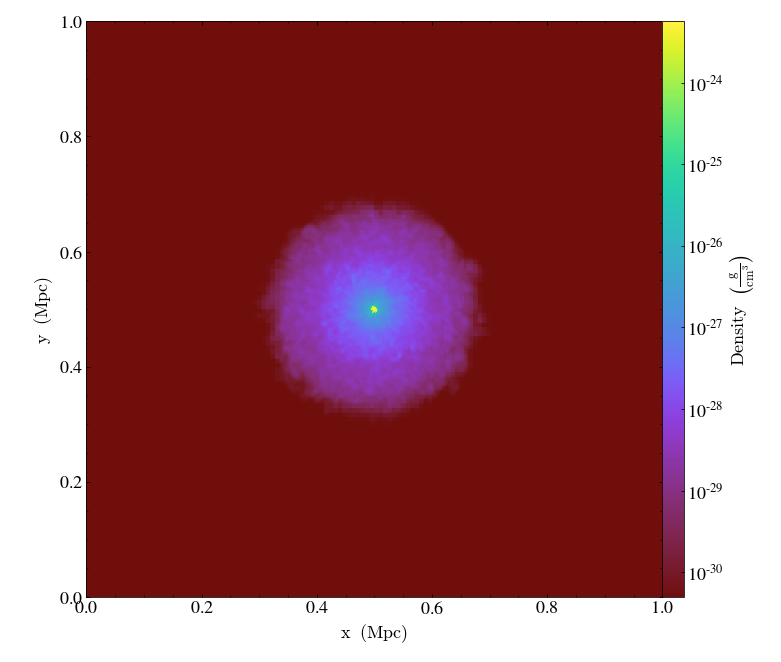

In [24]:
# before, we did a slice plot (by default)

# project in different ways from 3D -> 2D

# grabbing the max density along the z-axis

p2 = ds.r[:].max("density", axis='z').plot()

yt : [INFO     ] 2020-11-30 19:24:26,784 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



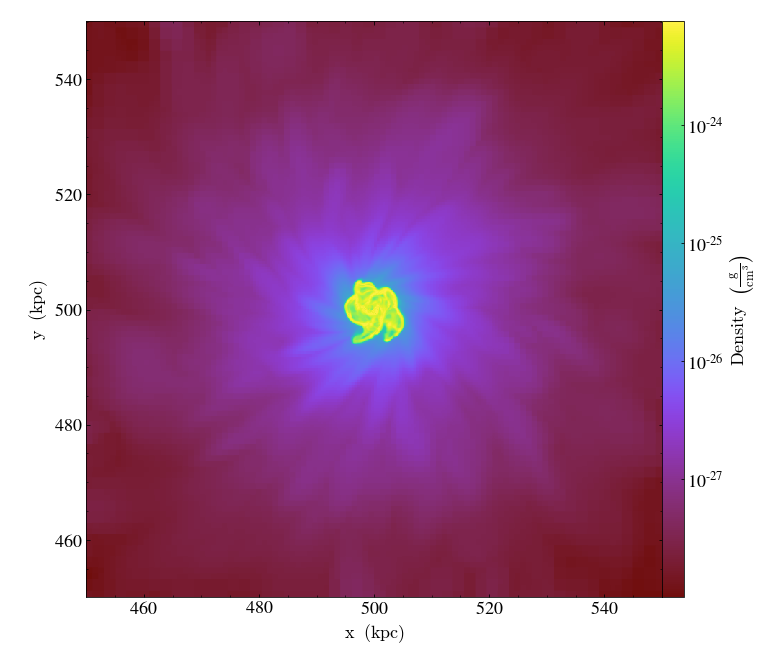

In [25]:
p2.zoom(10)

yt : [INFO     ] 2020-11-30 19:26:49,465 Projection completed
yt : [INFO     ] 2020-11-30 19:26:49,466 xlim = 0.100000 0.900000
yt : [INFO     ] 2020-11-30 19:26:49,466 ylim = 0.100000 0.900000
yt : [INFO     ] 2020-11-30 19:26:49,467 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



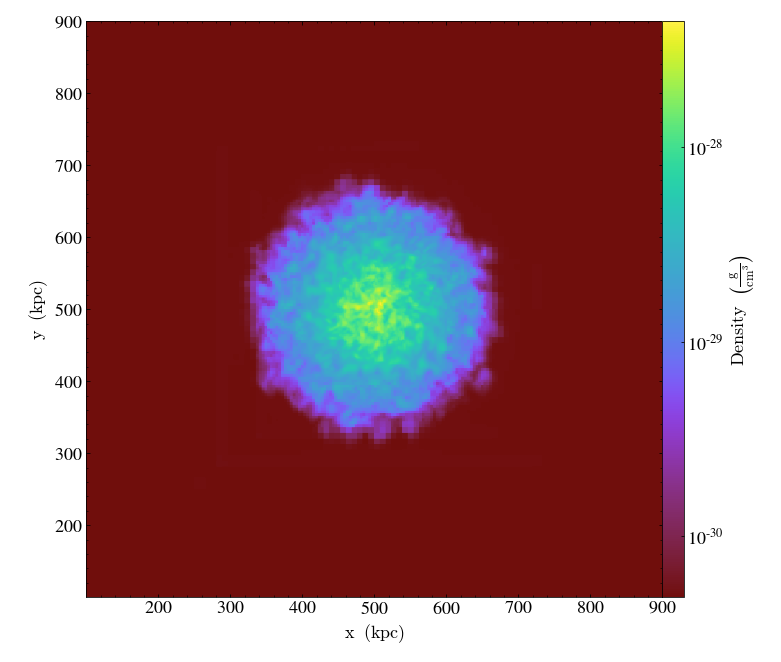

In [26]:
# have been doing things over the full box (r[:]) but we can do these kinds of projections over different 
# parts of the box

p = ds.r[0.1:0.9, 0.1:0.9, 0.55:0.65].max('density', axis='z').plot()

yt : [INFO     ] 2020-11-30 19:28:28,668 Projection completed
yt : [INFO     ] 2020-11-30 19:28:28,669 xlim = 0.100000 0.900000
yt : [INFO     ] 2020-11-30 19:28:28,670 ylim = 0.100000 0.900000
yt : [INFO     ] 2020-11-30 19:28:28,671 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



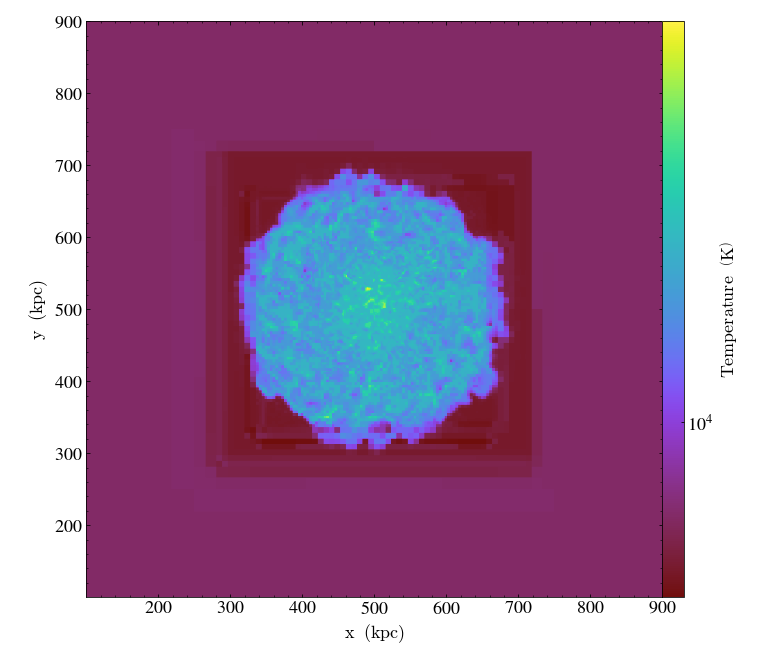

In [27]:
# we can also look at other variables -- gas temperature (gas density before)
p = ds.r[0.1:0.9, 0.1:0.9, 0.55:0.65].max('temperature', axis='z').plot()

yt : [WARNING  ] 2020-11-30 19:29:20,729 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2020-11-30 19:29:20,732 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2020-11-30 19:29:20,734 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2020-11-30 19:29:20,737 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2020-11-30 19:29:20,739 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2020-11-30 19:29:20,742 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2020-11-30 19:29:20,745 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2020-11-30 19:29:20,748 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2020-11-30 19:29:20,751 Supplied id_loc but draw_ids is False. Not drawing grid ids



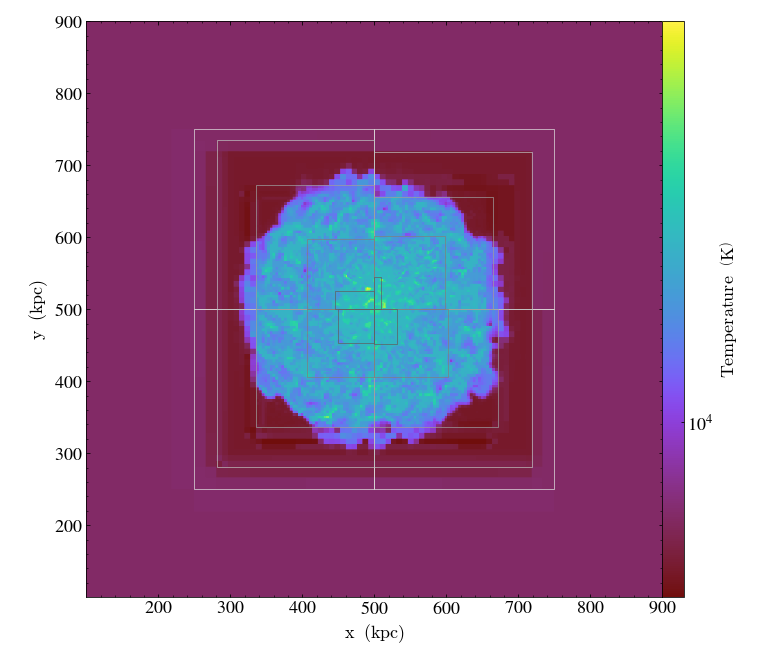

In [28]:
p.annotate_grids()


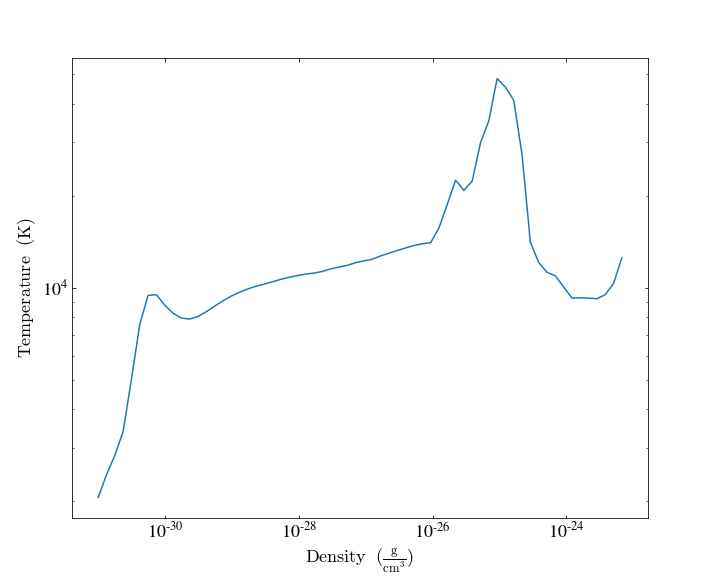

In [29]:
# do more analysis-type plots
ds.r[:].profile('density', 'temperature').plot()


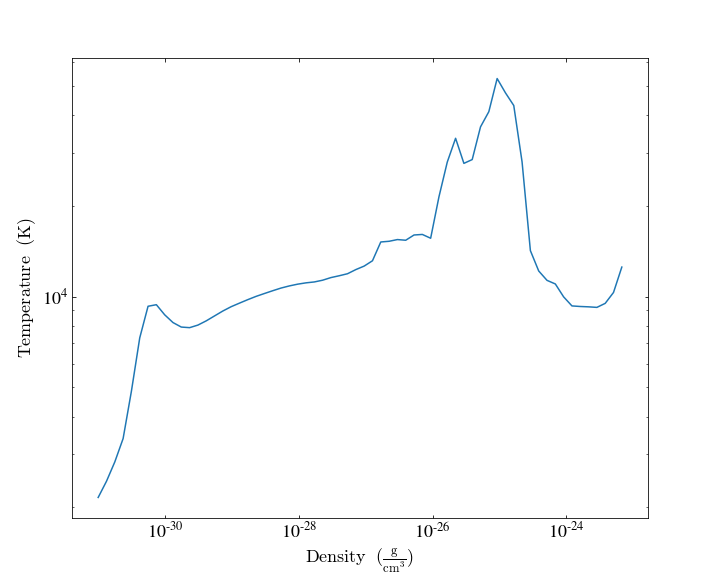

In [30]:
ds.r[:].profile('density', 'temperature', weight_field="density").plot()
# doing the same averaging but specifiying the weight field explicity

## Brain data with yt

In [31]:
import h5py # Python library to deal with HDF5 data (popular for science, spatial data)

In [32]:
with h5py.File('/Users/jillnaiman/Downloads/single_dicom.h5', 'r') as f:
    scan_data = f['/scan'][:]

In [33]:
scan_data.shape

(36, 512, 512)

In [34]:
import numpy as np

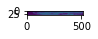

In [37]:
plt.imshow(scan_data[:,:,256])

In [49]:
# we want to make use of yt's sci-viz capabilities to analyize this dataset

ds2 = yt.load_uniform_grid({'scan':scan_data},
                          scan_data.shape, 
                          length_unit=yt.units.cm, 
                          bbox=np.array([[0, 10], [0,10], [0,10]]))

yt : [INFO     ] 2020-11-30 19:45:02,576 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-11-30 19:45:02,576 Parameters: domain_dimensions         = [ 36 512 512]
yt : [INFO     ] 2020-11-30 19:45:02,577 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-30 19:45:02,578 Parameters: domain_right_edge         = [10. 10. 10.]
yt : [INFO     ] 2020-11-30 19:45:02,579 Parameters: cosmological_simulation   = 0.0


In [50]:
ds2.domain_right_edge, ds2.domain_left_edge

(YTArray([10., 10., 10.]) code_length, YTArray([0., 0., 0.]) code_length)

In [51]:
ds2.field_list

[('stream', 'scan')]

In [52]:
#ds2.derived_field_list

yt : [INFO     ] 2020-11-30 19:45:05,162 Projection completed
yt : [INFO     ] 2020-11-30 19:45:05,164 xlim = 0.000000 10.000000
yt : [INFO     ] 2020-11-30 19:45:05,164 ylim = 0.000000 10.000000
yt : [INFO     ] 2020-11-30 19:45:05,165 Making a fixed resolution buffer of (('stream', 'scan')) 800 by 800



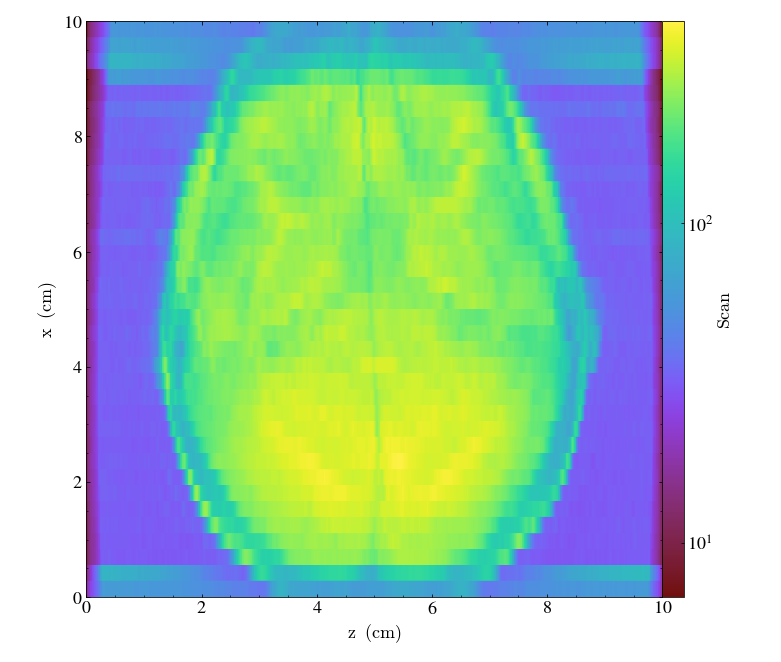

In [53]:
# let's (finally!) make a plot
ds2.r[:].mean("scan", axis="y").plot();

yt : [INFO     ] 2020-11-30 19:45:11,404 Projection completed
yt : [INFO     ] 2020-11-30 19:45:11,405 xlim = 0.000000 10.000000
yt : [INFO     ] 2020-11-30 19:45:11,406 ylim = 0.000000 10.000000
yt : [INFO     ] 2020-11-30 19:45:11,407 Making a fixed resolution buffer of (('stream', 'scan')) 800 by 800



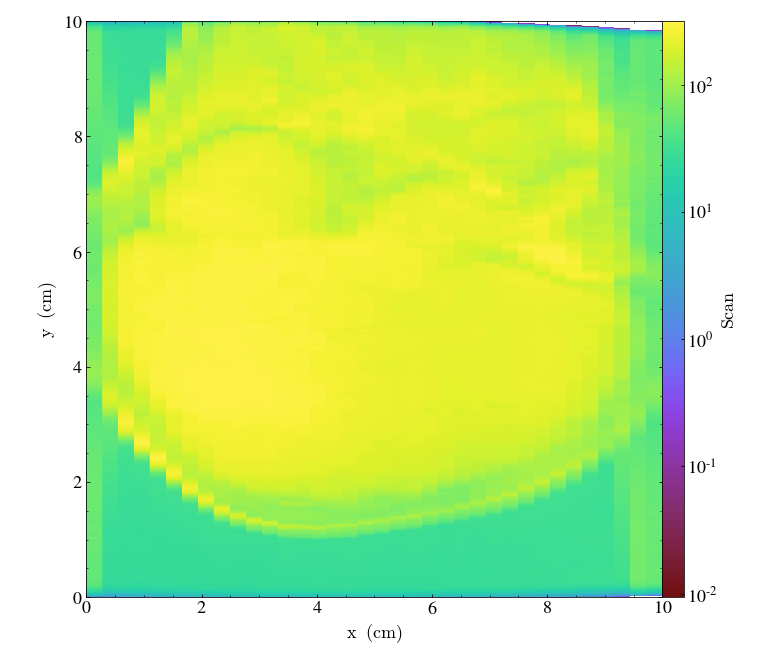

In [54]:
ds2.r[:].mean("scan", axis="z").plot();

yt : [INFO     ] 2020-11-30 19:45:22,647 Projection completed
yt : [INFO     ] 2020-11-30 19:45:22,649 xlim = 0.000000 10.000000
yt : [INFO     ] 2020-11-30 19:45:22,650 ylim = 0.000000 10.000000
yt : [INFO     ] 2020-11-30 19:45:22,650 Making a fixed resolution buffer of (('stream', 'scan')) 800 by 800



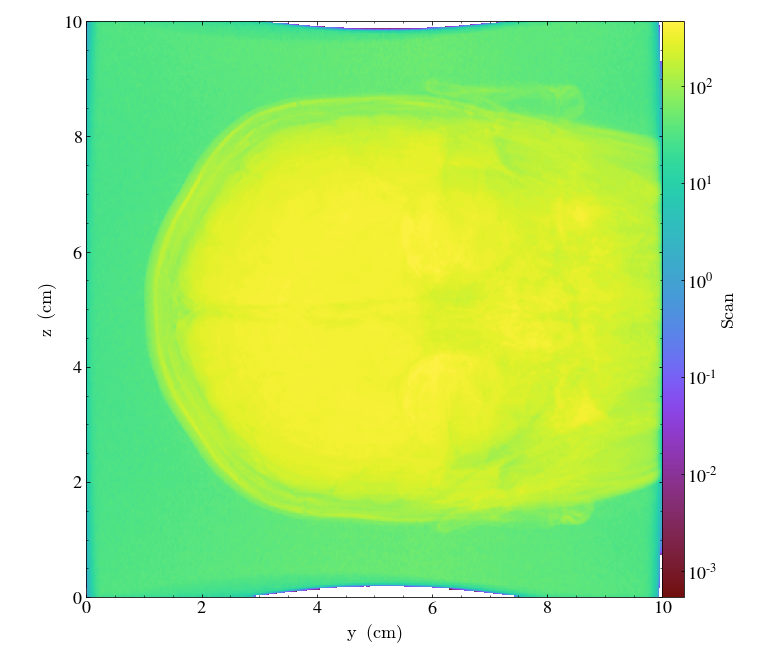

In [55]:
ds2.r[:].mean("scan", axis="x").plot();

yt : [INFO     ] 2020-11-30 19:46:44,269 xlim = 0.000000 10.000000
yt : [INFO     ] 2020-11-30 19:46:44,270 ylim = 0.000000 10.000000
yt : [INFO     ] 2020-11-30 19:46:44,271 Making a fixed resolution buffer of (scan) 800 by 800
yt : [INFO     ] 2020-11-30 19:46:44,477 Making a fixed resolution buffer of (('stream', 'scan')) 800 by 800



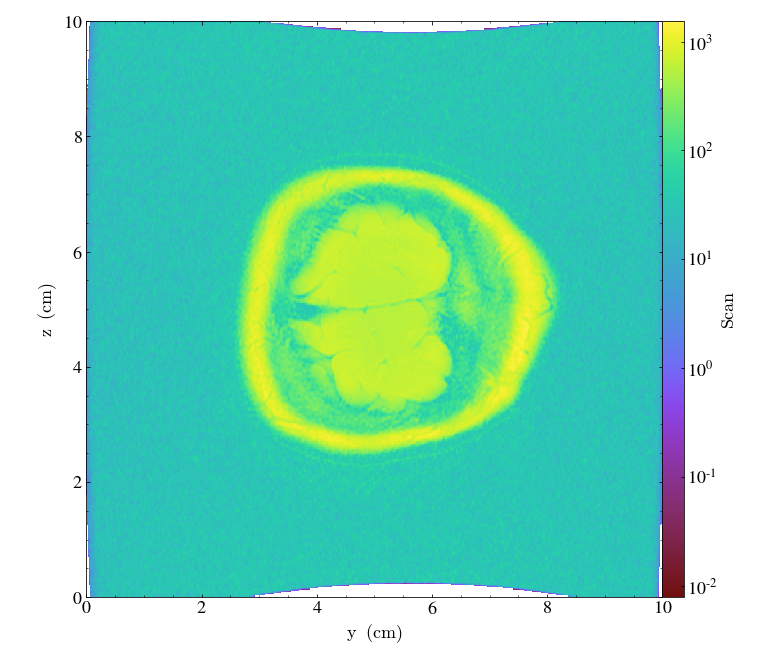

In [56]:
p = ds2.r[0.75, :,:].plot('scan')

In [57]:
# Make 3D objects with our galaxy data

# iso-density surface (surface of constant density)
# first thing is to take a subset of our data overwhich we want to make our surface

yt : [INFO     ] 2020-11-30 19:49:26,014 Max Value is 7.73427e-24 at 0.5040893554687501 0.4998168945312501 0.5001831054687500
yt : [INFO     ] 2020-11-30 19:49:26,441 Projection completed
yt : [INFO     ] 2020-11-30 19:49:26,443 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-11-30 19:49:26,443 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-11-30 19:49:26,445 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



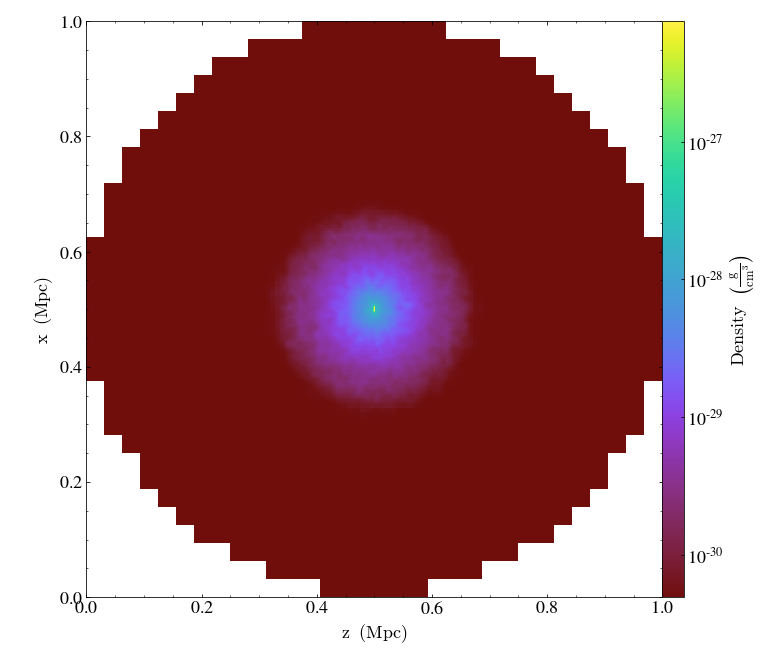

In [58]:
sphere = ds.sphere("max", (500, "kpc"))
sphere.mean("density", axis="y").plot(); # taking out regions of your domain

In [59]:
surface = ds.surface(sphere, "density", 1e-27)

In [60]:
surface.export_obj('/Users/jillnaiman/Downloads/myGalaxyFile', color_field='temperature')

yt : [INFO     ] 2020-11-30 19:51:33,914 Extracting (sampling: ('gas', 'temperature'))
